### sklearn.svm.SVC

*class* sklearn.svm.SVC(***, *C=1.0*, *kernel='rbf'*, *degree=3*, *gamma='scale'*, *coef0=0.0*, *shrinking=True*, *probability=False*, *tol=0.001*, *cache_size=200*, *class_weight=None*, *verbose=False*, *max_iter=- 1*, *decision_function_shape='ovr'*, *break_ties=False*, *random_state=None*)[[source]](https://github.com/scikit-learn/scikit-learn/blob/baf828ca1/sklearn/svm/_classes.py#L515)[¶](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [1]:
from sklearn import datasets
iris = datasets.load_iris()
x = iris.data
y = iris.target

from sklearn.model_selection import train_test_split
x_train,  x_test, y_train, y_test = train_test_split(x,y, test_size=5)

In [5]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)
clf.fit(x_train,y_train)
predictions = clf.predict(x_test)
print(f'y_test set : {y_test}')
from sklearn.metrics import accuracy_score
print(f'정확도 : {accuracy_score(y_test,predictions)}')


y_test set : [2 0 1 2 2]
정확도 : 1.0


---- 

### KNN

In [6]:

from sklearn.datasets import load_iris 
iris = load_iris()
print(iris.feature_names)
print(iris.target_names)
print(iris.data[0])
print(iris.target[0])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
[5.1 3.5 1.4 0.2]
0


In [8]:
from sklearn.datasets import load_iris 
iris = load_iris()

print(f'label 0 = setosa, label 1 = versicolor, label 2 =virginica')
for i in range(len(iris.target)):
    print(f"Example {i} : label:{iris.target[i]}, features : {iris.data[i]}")

label 0 = setosa, label 1 = versicolor, label 2 =virginica
Example 0 : label:0, features : [5.1 3.5 1.4 0.2]
Example 1 : label:0, features : [4.9 3.  1.4 0.2]
Example 2 : label:0, features : [4.7 3.2 1.3 0.2]
Example 3 : label:0, features : [4.6 3.1 1.5 0.2]
Example 4 : label:0, features : [5.  3.6 1.4 0.2]
Example 5 : label:0, features : [5.4 3.9 1.7 0.4]
Example 6 : label:0, features : [4.6 3.4 1.4 0.3]
Example 7 : label:0, features : [5.  3.4 1.5 0.2]
Example 8 : label:0, features : [4.4 2.9 1.4 0.2]
Example 9 : label:0, features : [4.9 3.1 1.5 0.1]
Example 10 : label:0, features : [5.4 3.7 1.5 0.2]
Example 11 : label:0, features : [4.8 3.4 1.6 0.2]
Example 12 : label:0, features : [4.8 3.  1.4 0.1]
Example 13 : label:0, features : [4.3 3.  1.1 0.1]
Example 14 : label:0, features : [5.8 4.  1.2 0.2]
Example 15 : label:0, features : [5.7 4.4 1.5 0.4]
Example 16 : label:0, features : [5.4 3.9 1.3 0.4]
Example 17 : label:0, features : [5.1 3.5 1.4 0.3]
Example 18 : label:0, features : 

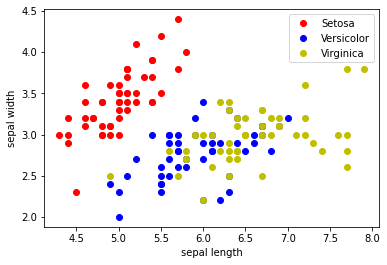

In [10]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
iris = load_iris()
sepal = iris.data[:,0:2]
kind = iris.target 

plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.plot (sepal[kind == 0][:,0], sepal[kind ==0][:,1],"ro",label='Setosa')
plt.plot (sepal[kind == 1][:,0], sepal[kind ==1][:,1],"bo",label='Versicolor')
plt.plot (sepal[kind == 2][:,0], sepal[kind ==2][:,1],"yo",label='Virginica')

plt.legend()

In [11]:
from sklearn.datasets import load_iris  
iris = load_iris()
#print(iris.data)
from sklearn.model_selection import train_test_split  
X = iris.data
y = iris.target

# (80:20)으로 분할한다.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)
print(X_train.shape)
print(X_test.shape)



(120, 4)
(30, 4)


In [15]:
from sklearn.neighbors import KNeighborsClassifier  
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=6)  
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
scores = metrics.accuracy_score(y_test, y_pred)
scores


0.9666666666666667

In [17]:
knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(X, y)

#0 = setosa, 1=versicolor, 2=virginica
classes = {0:'setosa',1:'versicolor',2:'virginica'}

# 아직 보지 못한 새로운 데이터를 제시해보자.  
x_new = [[3,4,5,2],[5,4,2,2]]
y_predict = knn.predict(x_new)

print(classes[y_predict[0]])  
print(classes[y_predict[1]])


versicolor
setosa


--------

In [18]:
from sklearn.datasets import make_regression,make_classification

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

#make classification이라는 데이터를 하나 만듦
X, y = make_classification(n_samples=100,n_features=10,n_informative=2)

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

# it takes a list of tuples as parameter
pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', LogisticRegression())
	])

# use the pipeline object as you would
# a regular classifier
pipeline.fit(X_train,y_train)


y_preds = pipeline.predict(X_test)

accuracy_score(y_test,y_preds)

0.8181818181818182

In [ ]:
from sklearn.datasets import make_regression,make_classification

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

#make classification이라는 데이터를 하나 만듦
# 함수 만들어서 넣어도 상관없다 
X, y = make_classification(n_samples=100,n_features=10,n_informative=2)

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

# it takes a list of tuples as parameter
pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', LogisticRegression())
	])

# use the pipeline object as you would
# a regular classifier
pipeline.fit(X_train,y_train)


y_preds = pipeline.predict(X_test)

accuracy_score(y_test,y_preds)

타이타닉할때 드랍시켜서 
숫자로 라벨인코더 했다. 
그리고 3가지를 나열한 다음에 
파이프로 연결시켜보자 



In [25]:
from sklearn import preprocessing 

def encode_features(dataDF):
  features = ['Cabin', 'Sex', 'Embarked']
  for feature in features:
    le = preprocessing.LabelEncoder()
    le = le.fit(dataDF[feature])
    dataDF[feature] = le.transform(dataDF[feature])
    
  return dataDF

In [26]:
from sklearn.datasets import make_regression,make_classification

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import pandas as pd

#make classification이라는 데이터를 하나 만듦
# 함수 만들어서 넣어도 상관없다 
# X, y = make_classification(n_samples=100,n_features=10,n_informative=2)

titanic_df = pd.read_csv('./dataset/titanic_train.csv')

y_titanic_df = titanic_df['Survived'] #레이블 값 만들어 Y값 데이터로 저장 
x_titanic_df = titanic_df.drop(['Survived'],axis=1) #레이블값을 제외한 인풋값 저장 
x_train,x_test,y_train,y_test = train_test_split(x_titanic_df,y_titanic_df, test_size=0.2,random_state= 42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape
#차원을 이야기하는건데 140,3이면 140개의 3개가 있다는건데 한 피쳐당 140개가 있다는 거고. 
# 5,6,4 이면 5행 4행렬이 3개니까 3차원 
# 5,4,100 이면 3차원 
# 그래서 갯수 세보려고 확인해보려고 찍는 것 이게 몇차원행렬인지 
# 140
#벡터는 어레이로 연산해야한다. 리스트로 연산하면 안된다. 


# it takes a list of tuples as parameter
pipeline = Pipeline([
    ('encode',encode_features(titanic_df)),
    ('clf', LogisticRegression())
	])

# use the pipeline object as you would
# a regular classifier
pipeline.fit(X_train,y_train)


y_preds = pipeline.predict(X_test)

accuracy_score(y_test,y_preds)

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [20]:
#판다스 데이터 프레임 파이프라인으로 전처리 하기 